### 1. Assessing a Model

In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

In [10]:
sample_proportions(sample_size, eligible_population)

array([ 0.33,  0.67])

In [11]:
def one_simulated_count():
    return sample_size * sample_proportions(sample_size, eligible_population).item(0)

In [23]:
counts = make_array()
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

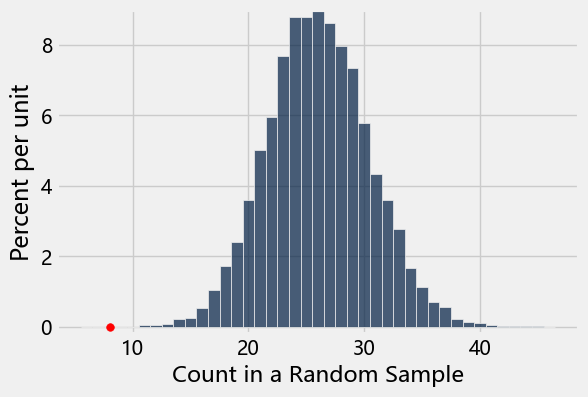

In [25]:
Table().with_column('Count in a Random Sample', counts).hist(bins = np.arange(5.5, 46.6, 1))
plots.ylim(-0.002, 0.09)
plots.scatter(8, 0, color='red', s=30);

### 2. Mutiple Categories

In [58]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [26]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian/PI', 'Black/AA', 'Caucasian', 'Hispanic', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.54, 0.12, 0.01),
    'Panels', make_array(0.26, 0.08, 0.54, 0.08, 0.04)
)
jury

Ethnicity,Eligible,Panels
Asian/PI,0.15,0.26
Black/AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


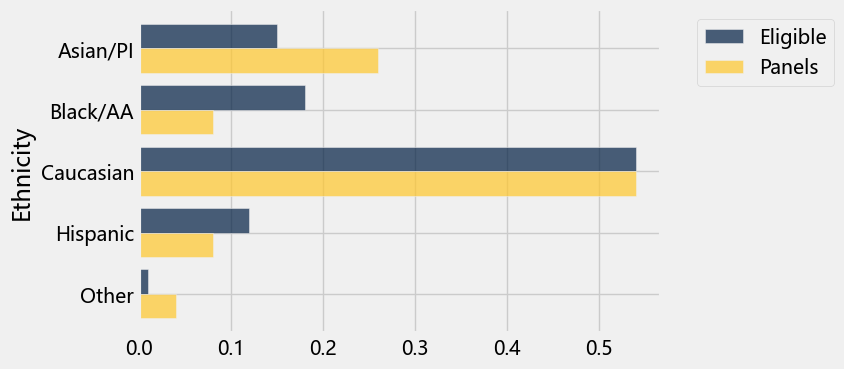

In [27]:
jury.barh('Ethnicity')

In [32]:
eligible_population = jury.column('Eligible')
sample_dirstribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_dirstribution)
panels_and_sample

Ethnicity,Eligible,Panels,Random Sample
Asian/PI,0.15,0.26,0.14797
Black/AA,0.18,0.08,0.174811
Caucasian,0.54,0.54,0.549897
Hispanic,0.12,0.08,0.12044
Other,0.01,0.04,0.00688231


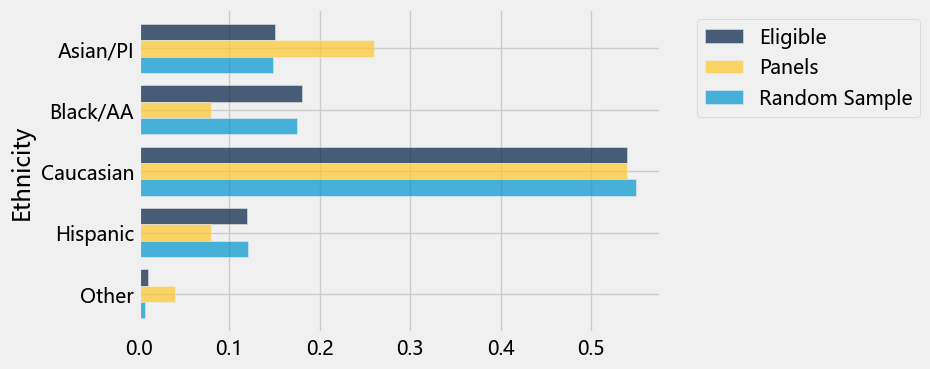

In [33]:
panels_and_sample.barh('Ethnicity')

In [34]:
jury_with_diffs = jury.with_column('Difference', jury.column('Panels') - jury.column('Eligible'))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference
Asian/PI,0.15,0.26,0.11
Black/AA,0.18,0.08,-0.1
Caucasian,0.54,0.54,0
Hispanic,0.12,0.08,-0.04
Other,0.01,0.04,0.03


In [35]:
jury_with_diffs = jury_with_diffs.with_column('Absolute Difference', np.abs(jury_with_diffs.column('Difference')))
jury_with_diffs

Ethnicity,Eligible,Panels,Difference,Absolute Difference
Asian/PI,0.15,0.26,0.11,0.11
Black/AA,0.18,0.08,-0.1,0.1
Caucasian,0.54,0.54,0,0
Hispanic,0.12,0.08,-0.04,0.04
Other,0.01,0.04,0.03,0.03


In [40]:
jury_with_diffs.column('Absolute Difference').sum()/2

0.14000000000000001

In [41]:
def total_variation_distance(distribution1, distribution2):
    return np.abs(distribution1 - distribution2).sum()/2

In [42]:
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

0.14000000000000001

In [48]:
sample_dirstribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_dirstribution, eligible_population)

0.015815554026152794

In [49]:
def one_simulated_tvd():
    sample_dirstribution = sample_proportions(1453, eligible_population)
    return total_variation_distance(sample_dirstribution, eligible_population)

In [56]:
tvds = make_array()
repetitions = 5000
for i in np.arange(repetitions):
    tvds = np.append(tvds, one_simulated_tvd())

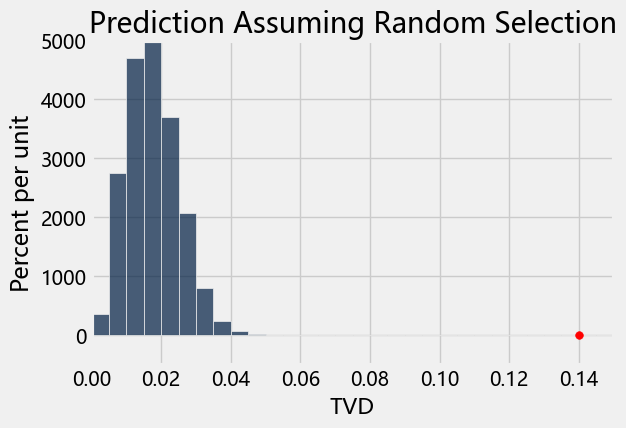

In [57]:
Table().with_column('TVD', tvds).hist(bins = np.arange(0, 0.2, 0.005))
plots.title('Prediction Assuming Random Selection')
plots.xlim(0, 0.15)
plots.ylim(-5, 50)
plots.scatter(0.14, 0, color='red', s=30);

### 3. Decisions and Uncertainty

In [59]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [61]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

In [62]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

In [63]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(sample_size, mendel_proportions).item(0)
    return abs(100 * sample_proportion_purple - 75)

In [74]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

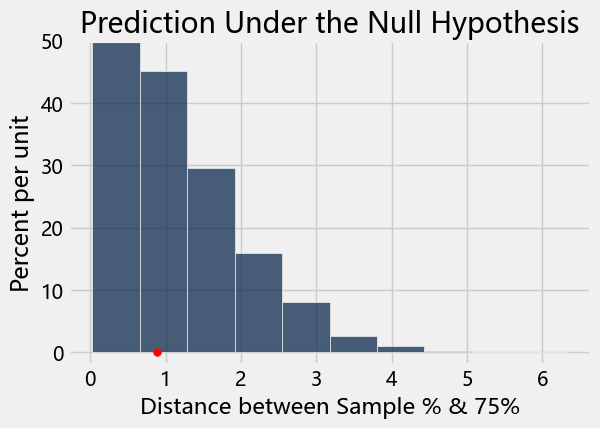

In [82]:
Table().with_column('Distance between Sample % & 75%', distances).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Under the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=30)
plots.show()

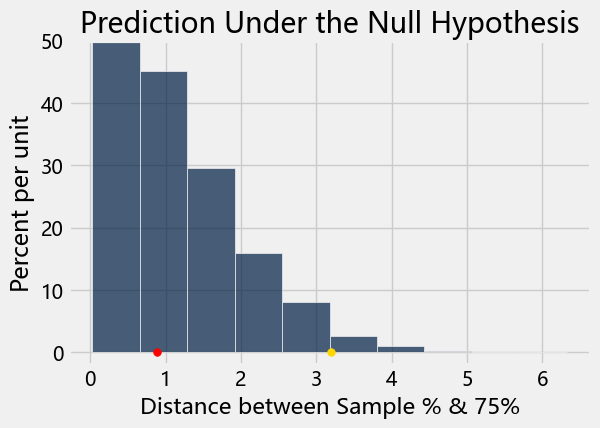

In [83]:
different_observed_statistic = 3.2
Table().with_column('Distance between Sample % & 75%', distances).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Under the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=30)
plots.scatter(different_observed_statistic, 0, color='gold', s=30)
plots.show()

In [84]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0245

### 4. Error Probabilities

In [85]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

Text(0.5, 1.0, '2000 tosses')

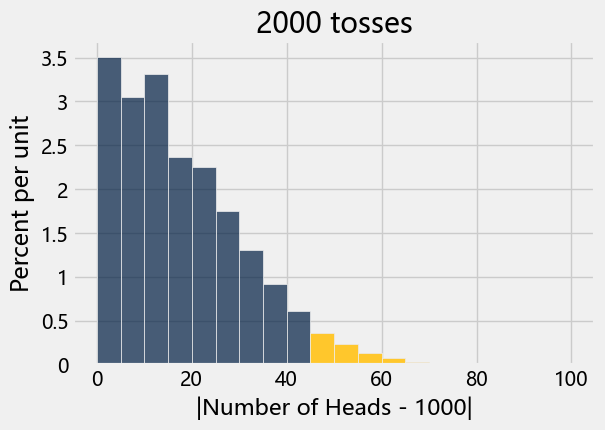

In [88]:
fair_coin = make_array(0.5, 0.5)

def one_simulated_statistic():
    number_of_heads = 2000 * sample_proportions(2000, fair_coin).item(0)
    return abs(number_of_heads - 1000)

repetitions = 50000

statistics = make_array()
for i in np.arange(repetitions):
    statistics = np.append(statistics, one_simulated_statistic())

results = Table().with_column('|Number of Heads - 1000|', statistics)
results.hist(bins = np.arange(0, 101, 5), left_end = 45)
plots.title('2000 tosses')

In [89]:
np.count_nonzero(statistics >= 45) / repetitions

0.04508